# Model 2 trajectories

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.animation as animation

# Import data
experiments = pd.read_csv("CSV/ball_1_substrate_1_i_1.csv")
# NOTE: Fixed radius 16.75
experiments = experiments[['POSITION_X', 'POSITION_Y', 'FRAME']] # Columns of interest
experiments = experiments[3:]
experiments[['POSITION_X', 'POSITION_Y']] = experiments[['POSITION_X', 'POSITION_Y']].astype(float)
experiments['FRAME'] = experiments['FRAME'].astype(int)
experiments = experiments.sort_values(by=['FRAME'])

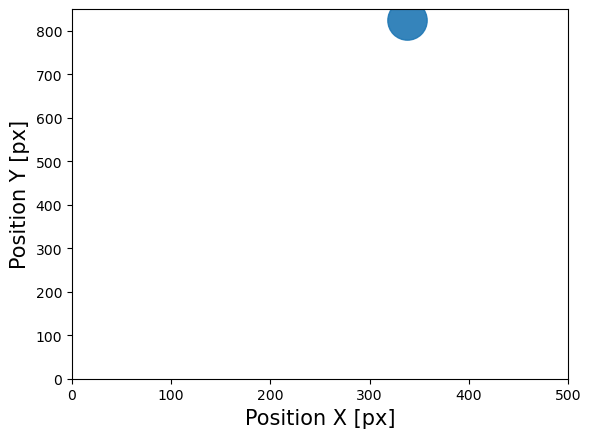

In [27]:
# Create trajectories animation

frames_num = len(pd.unique(experiments['FRAME']))

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xlabel('Position X [px]', fontsize=15)
ax.set_ylabel('Position Y [px]', fontsize=15)

# Create an empty scatter plot (initially no balls are shown)
scatter = ax.scatter([], [], s=800, alpha=0.9)
ax.set(xlim=[0, 500], ylim=[0, 850])

# Function to update the scatter plot with new ball positions
def update(frame):
    frame_df = experiments[experiments['FRAME'] == frame]
    x = frame_df['POSITION_X']
    y = frame_df['POSITION_Y']
    
    # update the scatter plot:
    data = np.stack([x, y]).T
    scatter.set_offsets(data)

    return scatter,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(frames_num), interval=50, blit=True)
ani.save('animation2.gif', writer='pillow')
plt.show()

In [28]:
# Import data
experiments = pd.read_csv("CSV/ball_1_substrate_1_i_1.csv")
# NOTE: Fixed radius 16.75
experiments = experiments[['POSITION_X', 'POSITION_Y', 'FRAME']] # Columns of interest
experiments = experiments[3:]
experiments[['POSITION_X', 'POSITION_Y']] = experiments[['POSITION_X', 'POSITION_Y']].astype(float)
experiments['FRAME'] = experiments['FRAME'].astype(int)
experiments = experiments.sort_values(by=['FRAME'])

# Data frame
vwr_df = pd.DataFrame(columns=['FRAME', 'POSITION_X', 'POSITION_Y',
                               'VELOCITY_X', 'VELOCITY_Y', 'VELOCITY_MAG', 
                               'RADIUS', 'ANGULAR_VELOCITY', 'ANGLE_DIFF'])
 

# Calculate v, w and r per agent
frames_num = len(experiments['FRAME'])
vel_x = np.zeros(frames_num)
vel_y = np.zeros(frames_num)
vel_mag = np.zeros(frames_num)

ang = np.zeros(frames_num)
ang_vel = np.zeros(frames_num)

r = np.zeros(frames_num)

ind_prev = experiments[experiments['FRAME'] == 0].index
x_prev = experiments.loc[ind_prev, 'POSITION_X'].iloc[0] - 240
y_prev = experiments.loc[ind_prev, 'POSITION_Y'].iloc[0] - 240

r[0] =  np.sqrt(x_prev**2 + y_prev**2)
r_prev = r[0]

# Assume unit time step per frame
for i in experiments['FRAME'].values:
    ind = experiments[experiments['FRAME'] == i].index
    x = experiments.loc[ind, 'POSITION_X'].iloc[0]
    y = experiments.loc[ind, 'POSITION_Y'].iloc[0]

    vel_x[i] = x - x_prev
    vel_y[i] = y - y_prev
    vel_mag[i] = np.sqrt(vel_x[i]**2 + vel_y[i]**2)

    r[i] =  np.sqrt(x**2 + y**2)
    ang_vel[i] = vel_mag[i]/r[i]

    vec_cos = (x_prev*(vel_x[i]) + y_prev*vel_y[i])/(vel_mag[i]*r_prev)
    angle_rad = np.arccos(vec_cos)
    ang[i] = np.degrees(angle_rad)

    # Update values
    ind_prev = ind
    x_prev = x
    y_prev = y
    r_prev = r[i]

vwr_df = pd.DataFrame({'FRAME': experiments['FRAME'].values,
                         'POSITION_X': experiments['POSITION_X'], 'POSITION_Y': experiments['POSITION_Y'], 
                         'VELOCITY_X': vel_x, 'VELOCITY_Y': vel_y, 'VELOCITY_MAG': vel_mag, 
                         'RADIUS': r, 'ANGULAR_VELOCITY': ang_vel, 'ANGLE_DIFF': ang})

# Make pretty plots
fig = plt.figure(figsize=(8, 5))

plt.plot(vwr_df['FRAME'], vwr_df['ANGLE_DIFF'], color='#004474', linewidth=0.7)
plt.ylabel('Angle difference  $\\alpha_i$  [ degrees ]', fontsize=15)
plt.xlabel('Frame', fontsize=15)
plt.show()

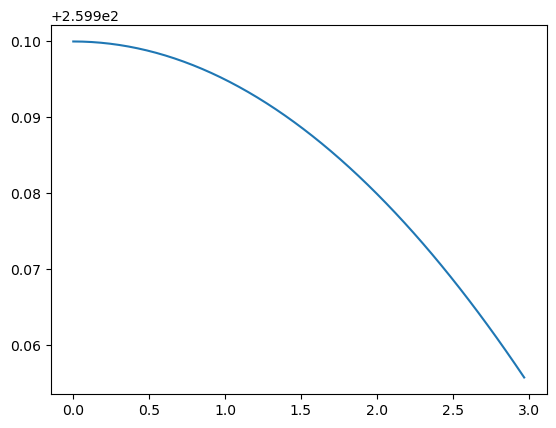

In [69]:
from scipy.special import j0
#Bessel function
frames = 0.03*np.linspace(0, frames_num)
bessel = 4*65*j0(4*frames/(7*65))
plt.plot(frames, bessel)
plt.show()

ball_1_substrate_1_i_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


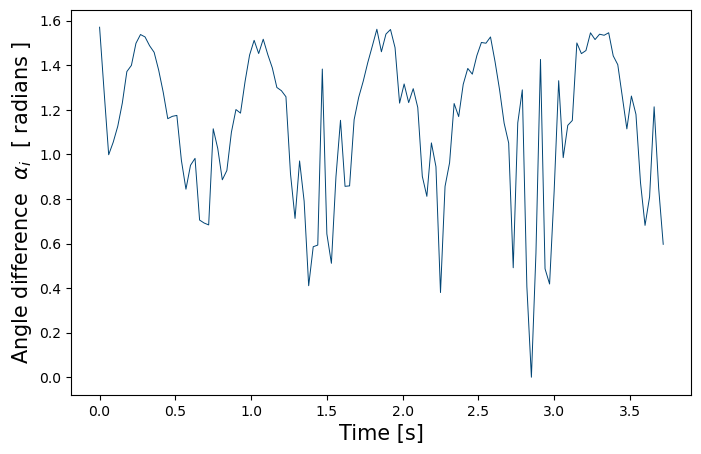

ball_1_substrate_1_i_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


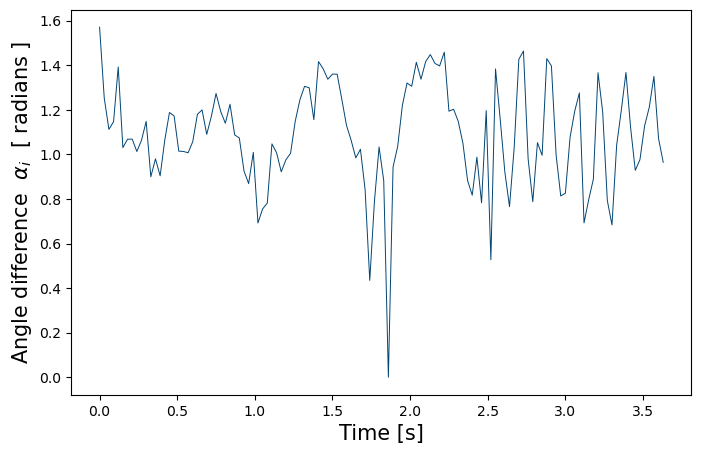

No CSV file with that name - move on
ball_1_substrate_1_o_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


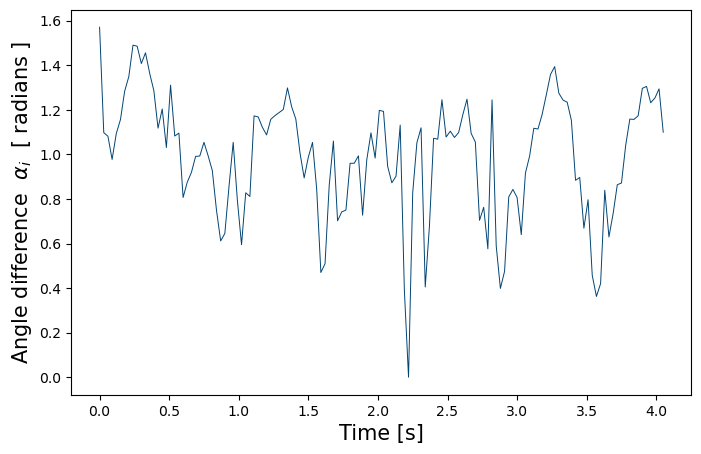

ball_1_substrate_1_o_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


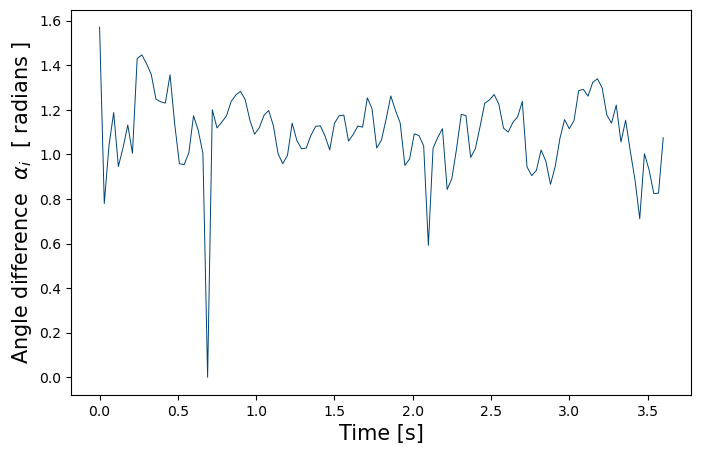

ball_1_substrate_1_o_3


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


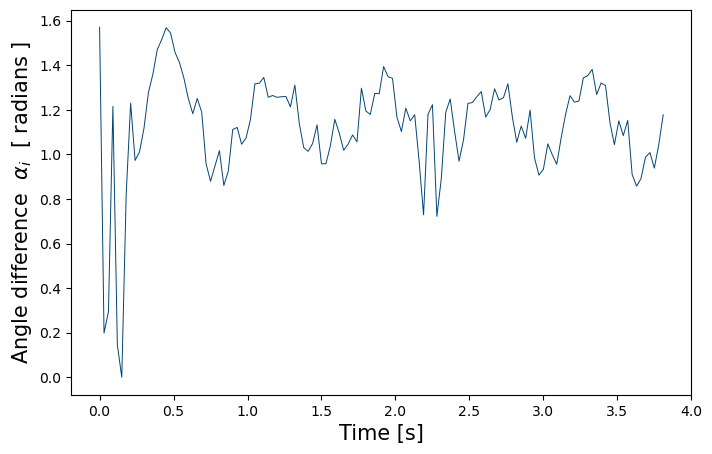

ball_1_substrate_2_i_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


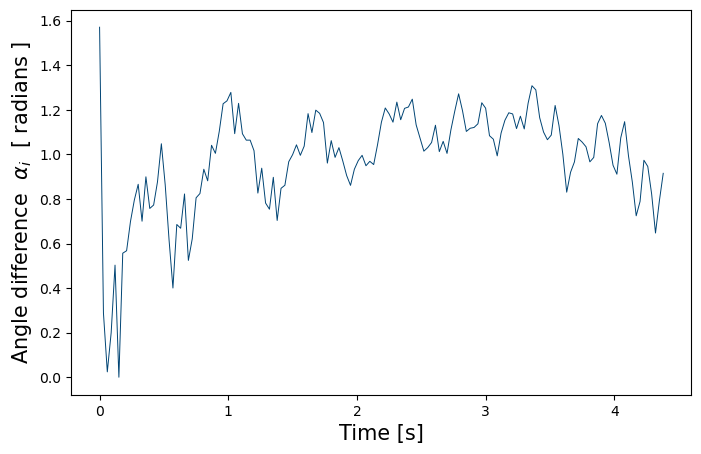

ball_1_substrate_2_i_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


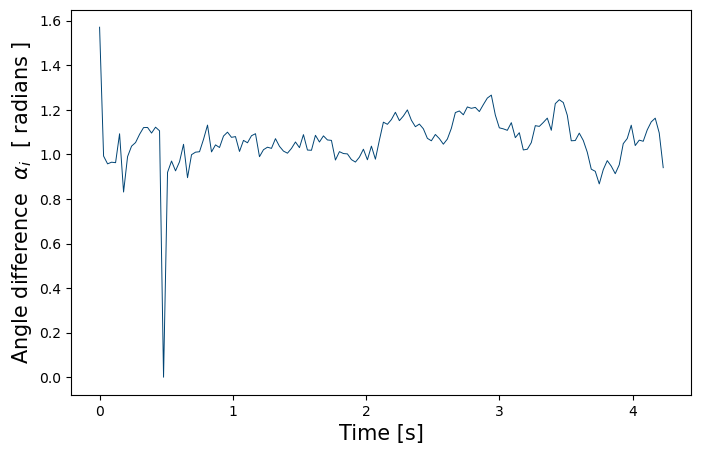

ball_1_substrate_2_i_3


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


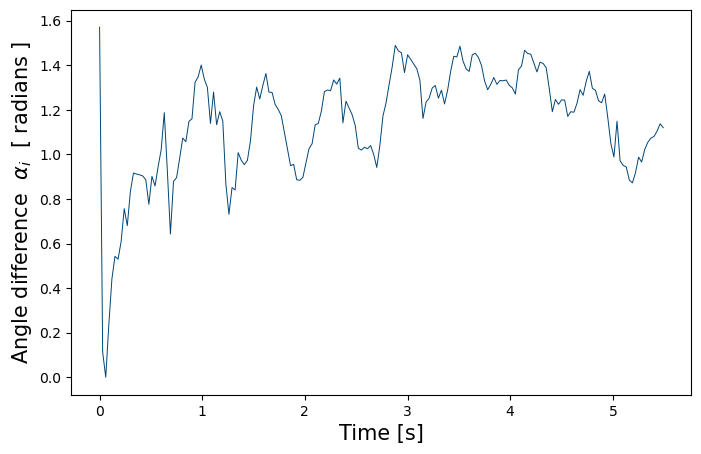

ball_1_substrate_2_o_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


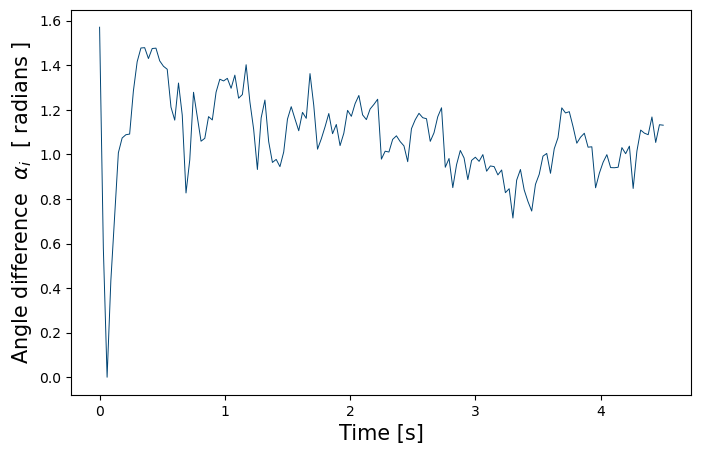

ball_1_substrate_2_o_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


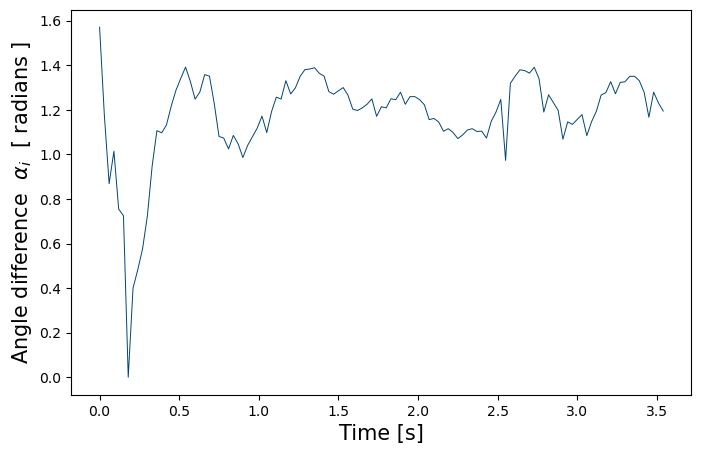

ball_1_substrate_2_o_3


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


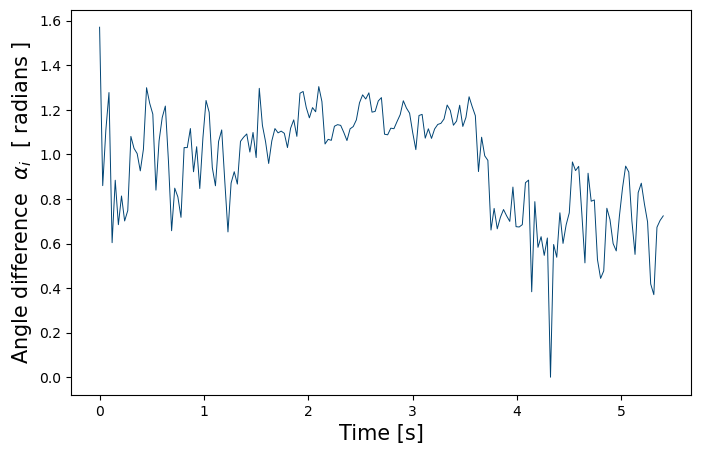

ball_2_substrate_1_i_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


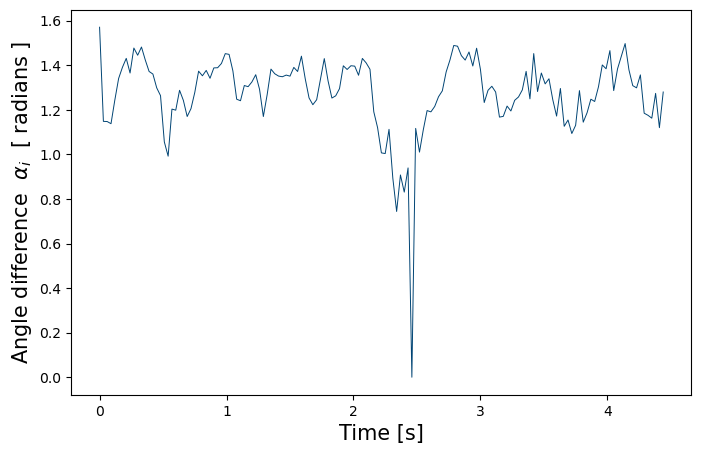

ball_2_substrate_1_i_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


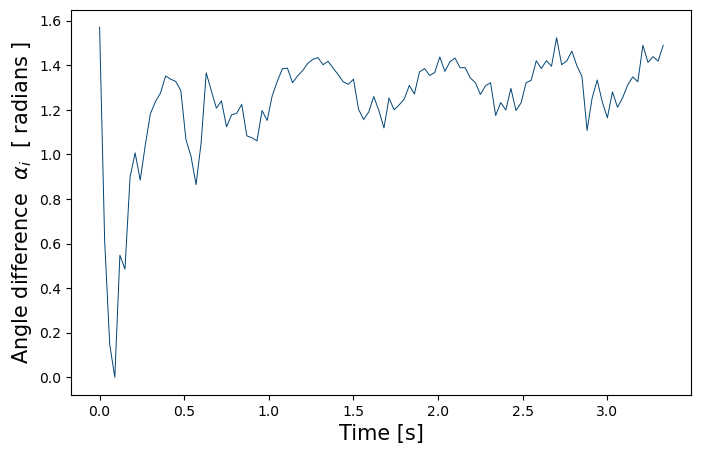

/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


ball_2_substrate_1_i_3


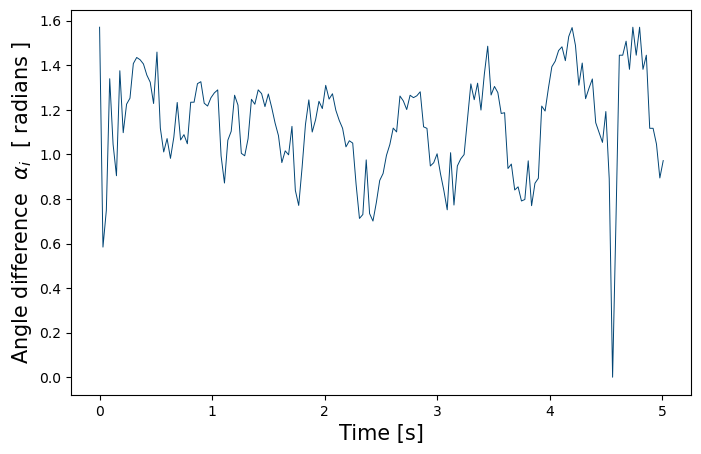

ball_2_substrate_1_o_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


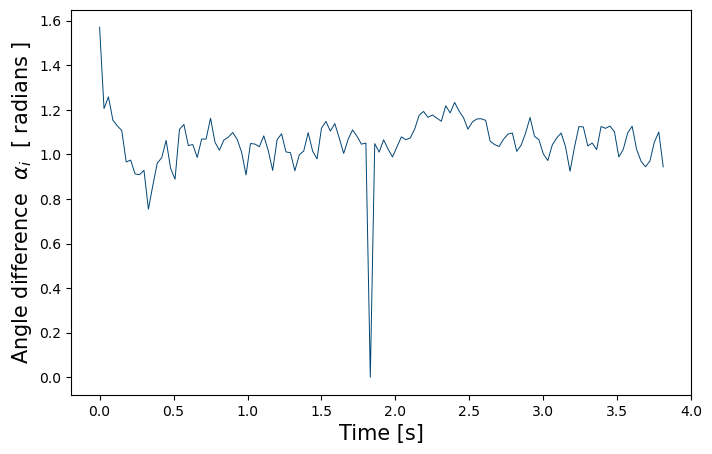

ball_2_substrate_1_o_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


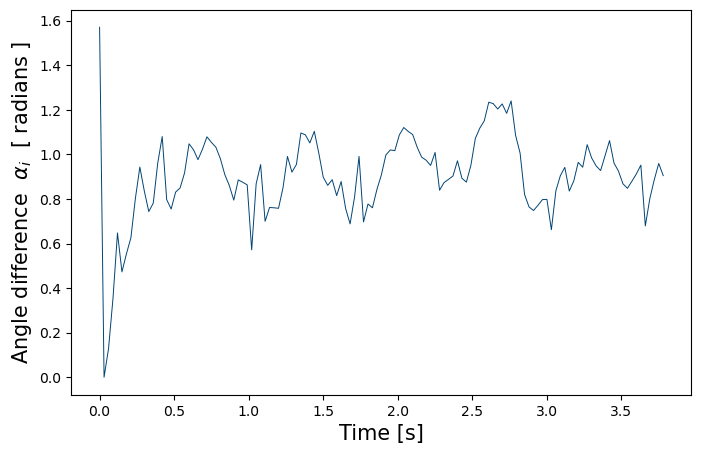

ball_2_substrate_1_o_3


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


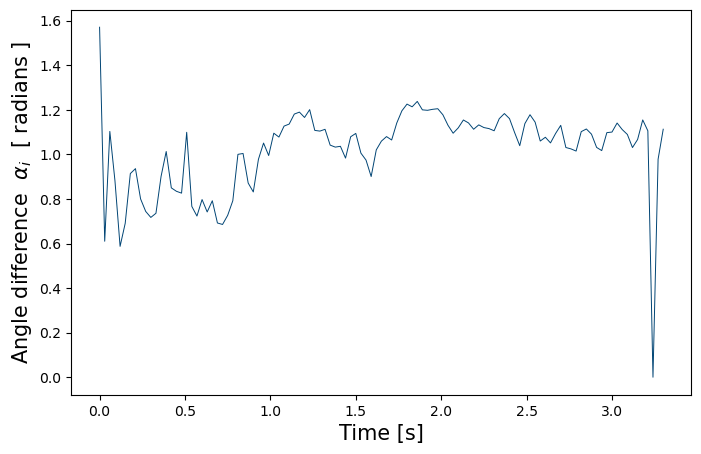

No CSV file with that name - move on
No CSV file with that name - move on
No CSV file with that name - move on
ball_2_substrate_2_o_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


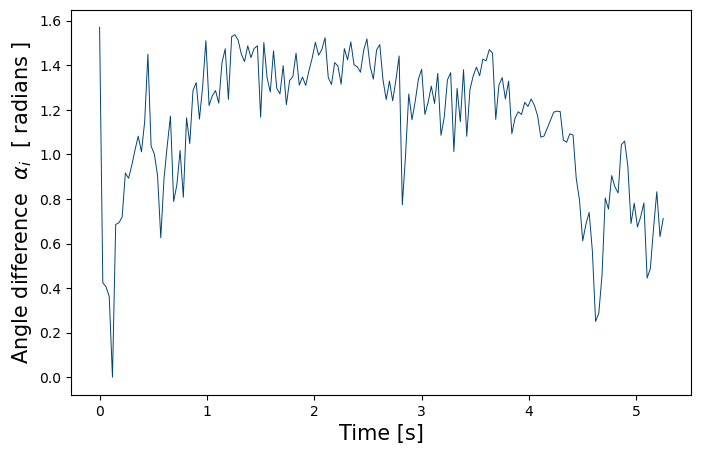

ball_2_substrate_2_o_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


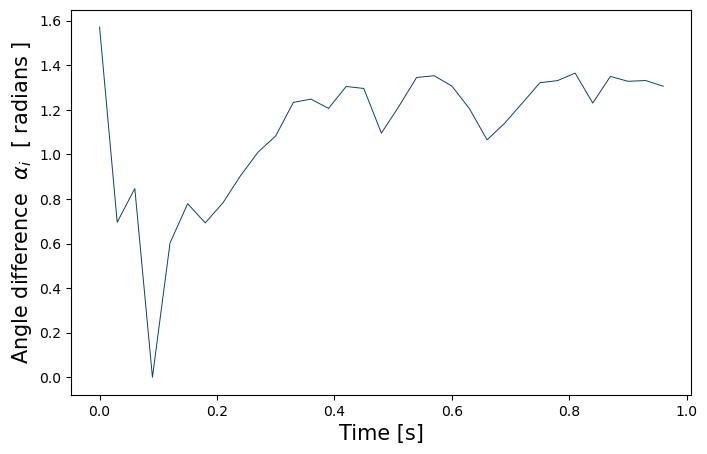

No CSV file with that name - move on
ball_3_substrate_1_i_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


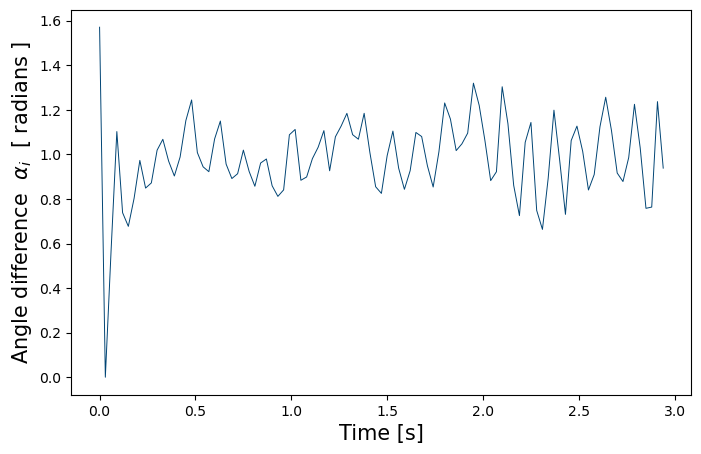

ball_3_substrate_1_i_2


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


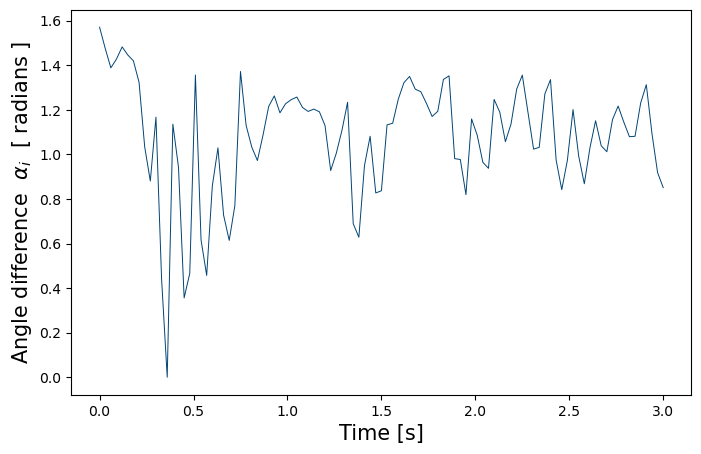

No CSV file with that name - move on
ball_3_substrate_1_o_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


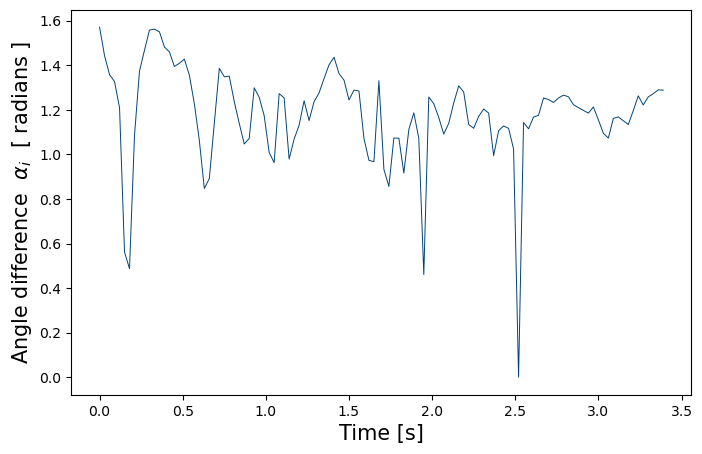

ball_3_substrate_1_o_2
No CSV file with that name - move on
ball_3_substrate_1_o_3
No CSV file with that name - move on
ball_3_substrate_2_i_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


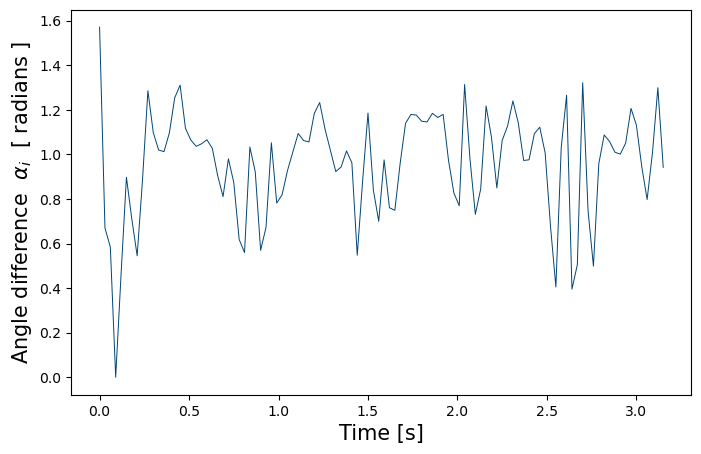

ball_3_substrate_2_i_2
No CSV file with that name - move on
ball_3_substrate_2_i_3


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


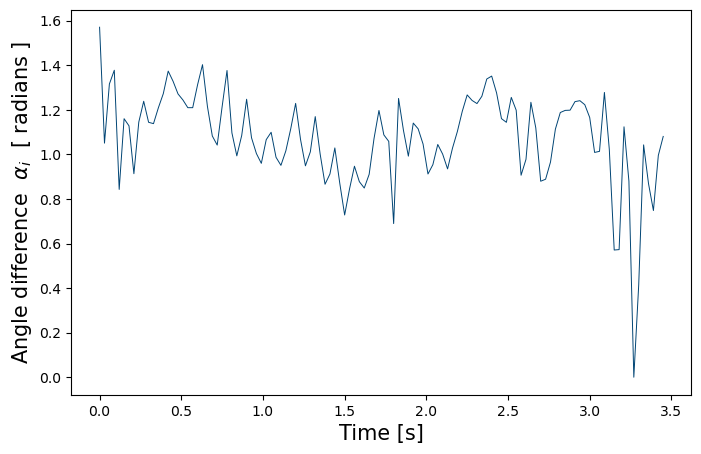

ball_3_substrate_2_o_1


/tmp/ipykernel_144354/211986501.py:50: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp


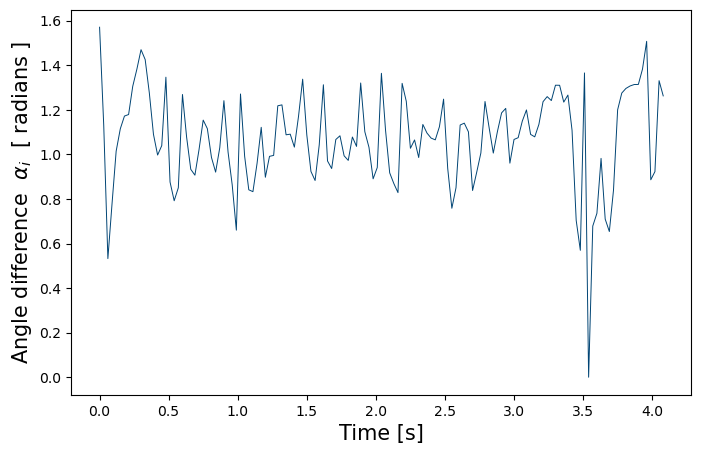

ball_3_substrate_2_o_2
No CSV file with that name - move on
ball_3_substrate_2_o_3
No CSV file with that name - move on


In [83]:
for ball in [1,2,3]:
    for sub in [1,2]:
        for i_o in ['i', 'o']:
            for take in [1,2,3]:
                try: 
                    # Import data
                    experiments = pd.read_csv(f"CSV/ball_{ball}_substrate_{sub}_{i_o}_{take}.csv")
                    print(f'ball_{ball}_substrate_{sub}_{i_o}_{take}')
                    # NOTE: Fixed radius 16.75
                    experiments = experiments[['POSITION_X', 'POSITION_Y', 'FRAME']] # Columns of interest
                    experiments = experiments[3:]
                    experiments[['POSITION_X', 'POSITION_Y']] = experiments[['POSITION_X', 'POSITION_Y']].astype(float)
                    experiments['FRAME'] = experiments['FRAME'].astype(int)
                    experiments = experiments.sort_values(by=['FRAME'])

                    # Data frame
                    vwr_df = pd.DataFrame(columns=['FRAME', 'POSITION_X', 'POSITION_Y',
                                                'VELOCITY_X', 'VELOCITY_Y', 'VELOCITY_MAG', 
                                                'RADIUS', 'ANGULAR_VELOCITY', 'ANGLE_DIFF'])
                    

                    # Calculate v, w and r per agent
                    frames_num = len(experiments['FRAME'])
                    vel_x = np.zeros(frames_num)
                    vel_y = np.zeros(frames_num)
                    vel_mag = np.zeros(frames_num)

                    ind_prev = experiments[experiments['FRAME'] == 0].index
                    x_prev = experiments.loc[ind_prev, 'POSITION_X'].iloc[0]
                    y_prev = experiments.loc[ind_prev, 'POSITION_Y'].iloc[0]


                    # Assume unit time step per frame
                    for i in experiments['FRAME'].values:
                        ind = experiments[experiments['FRAME'] == i].index
                        x = experiments.loc[ind, 'POSITION_X'].iloc[0]
                        y = experiments.loc[ind, 'POSITION_Y'].iloc[0]

                        vel_x[i] = x - x_prev
                        vel_y[i] = y - y_prev
                        vel_mag[i] = np.sqrt(vel_x[i]**2 + vel_y[i]**2)

                        # Update values
                        ind_prev = ind
                        x_prev = x
                        y_prev = y

                    vel_max = max(vel_mag)

                    angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag # Normal comp
                    angle = np.arctan(angle)

                    vwr_df = pd.DataFrame({'FRAME': 0.03*experiments['FRAME'].values,
                                            'POSITION_X': experiments['POSITION_X'], 'POSITION_Y': experiments['POSITION_Y'], 
                                            'VELOCITY_X': vel_x, 'VELOCITY_Y': vel_y, 'VELOCITY_MAG': vel_mag, 'ANGLE_DIFF': angle})

                    # Make pretty plots
                    fig = plt.figure(figsize=(8, 5))

                    plt.plot(vwr_df['FRAME'], vwr_df['ANGLE_DIFF'], color='#004474', linewidth=0.7)
                    
                    plt.ylabel('Angle difference  $\\alpha_i$  [ radians ]', fontsize=15)
                    plt.xlabel('Time [s]', fontsize=15)
                    plt.show()
                except:
                    print('No CSV file with that name - move on')

ball_1_substrate_1_i_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


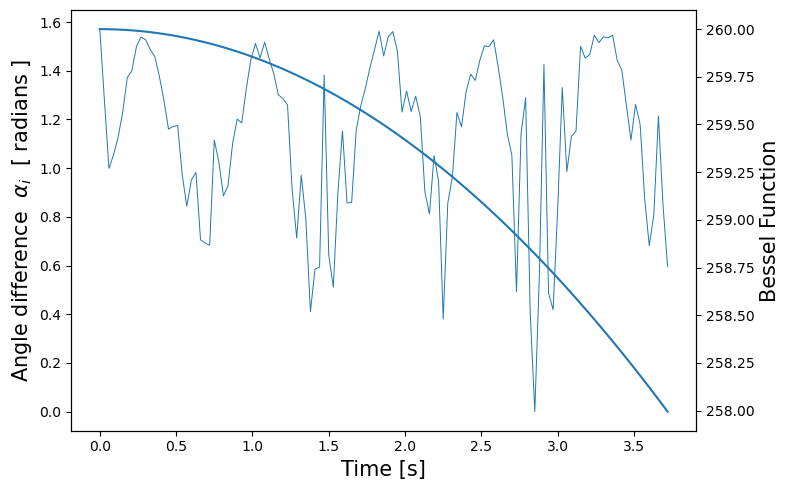

ball_1_substrate_1_i_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


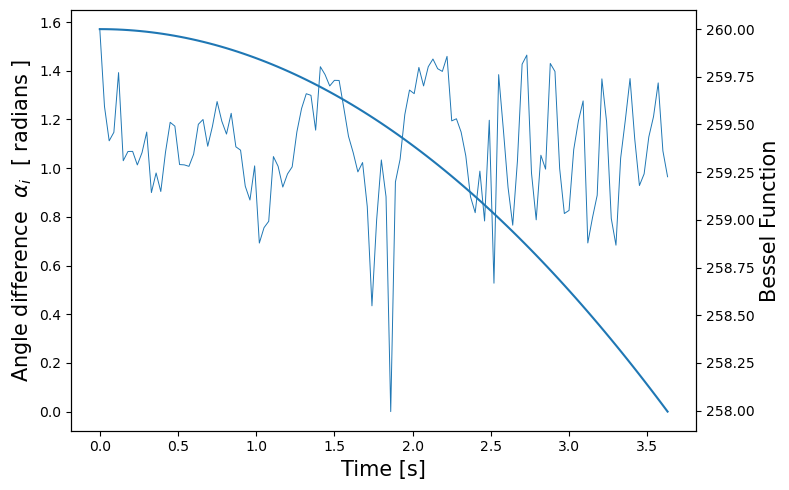

No CSV file with that name - move on
ball_1_substrate_1_o_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


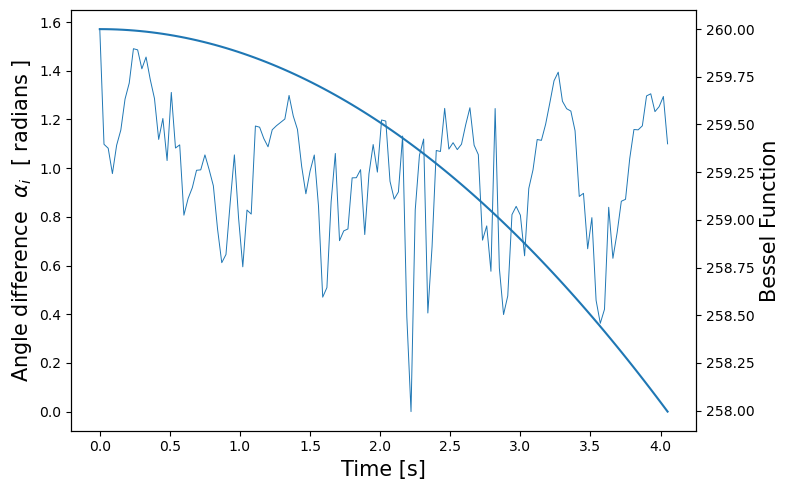

ball_1_substrate_1_o_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


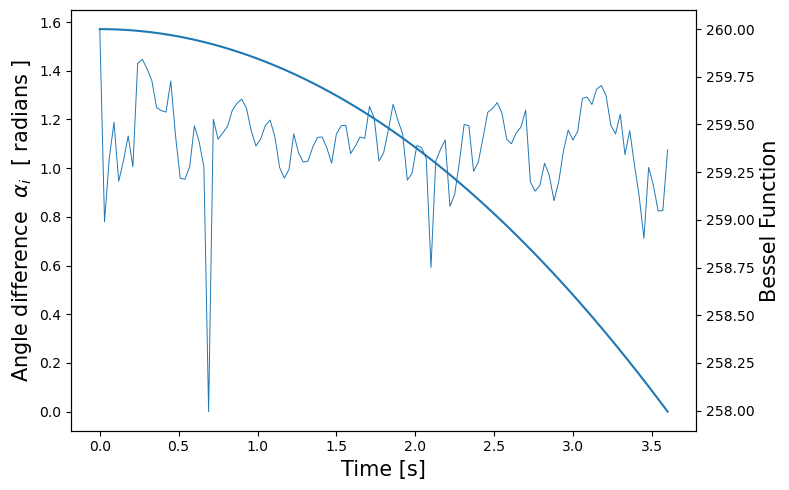

ball_1_substrate_1_o_3


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


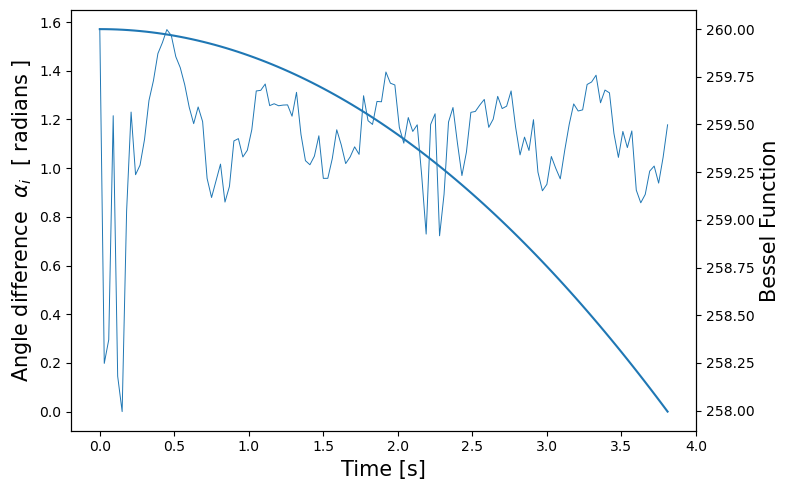

ball_1_substrate_2_i_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


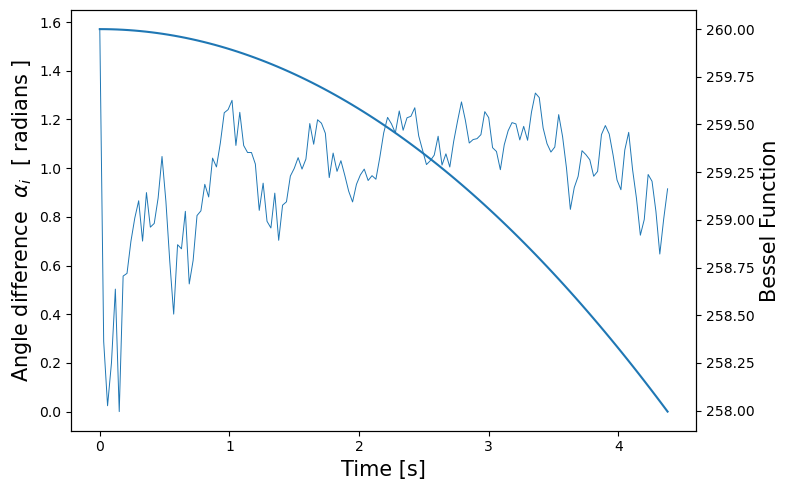

ball_1_substrate_2_i_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


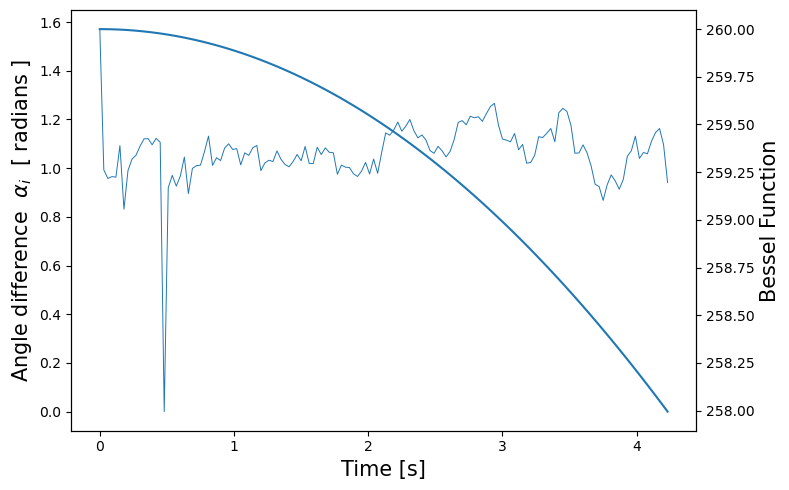

ball_1_substrate_2_i_3


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


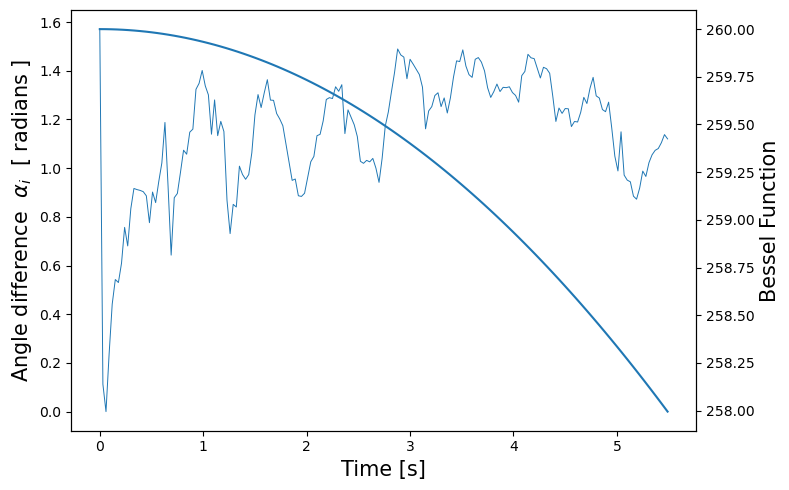

ball_1_substrate_2_o_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


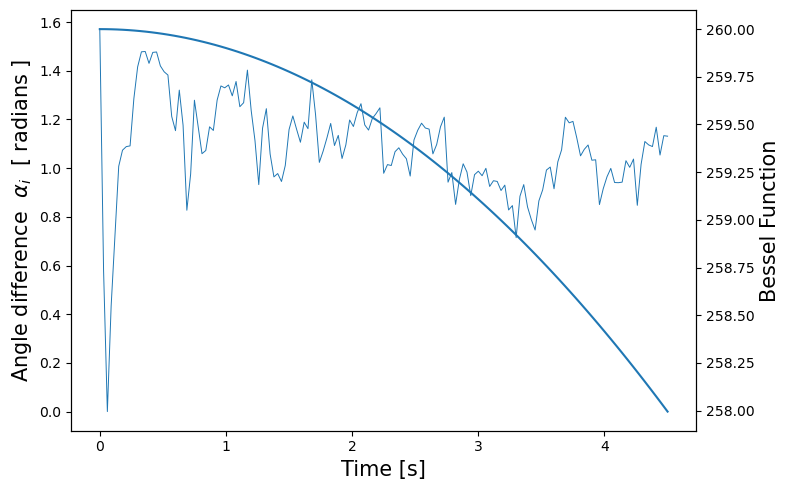

ball_1_substrate_2_o_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


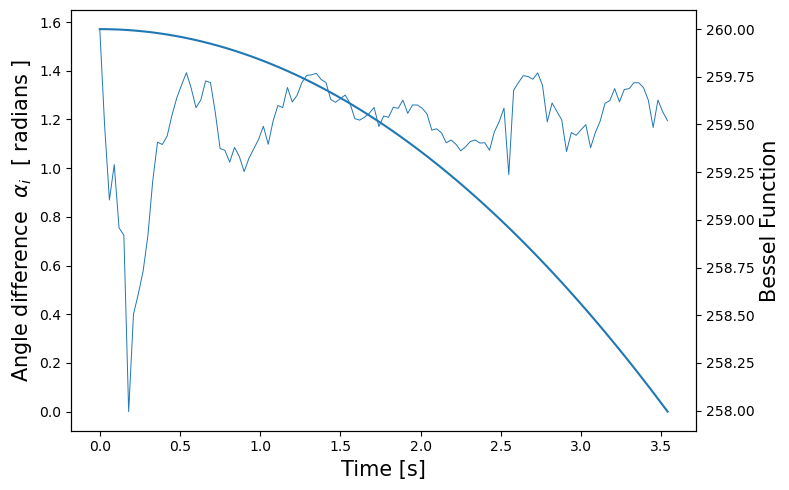

ball_1_substrate_2_o_3


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


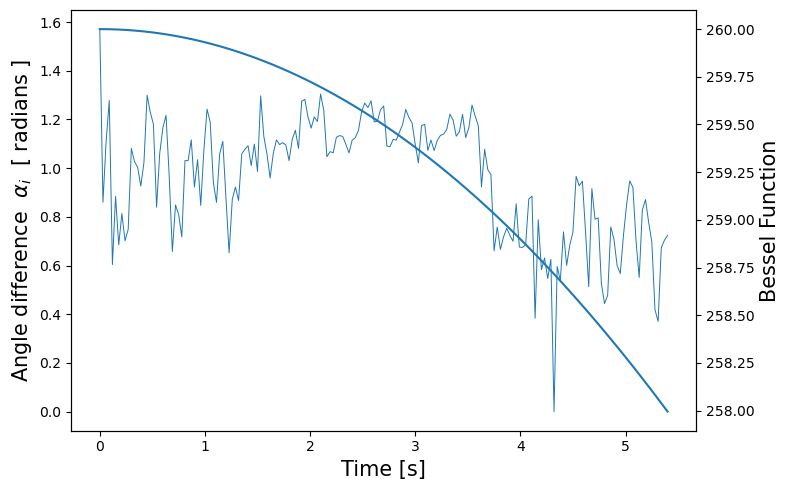

ball_2_substrate_1_i_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


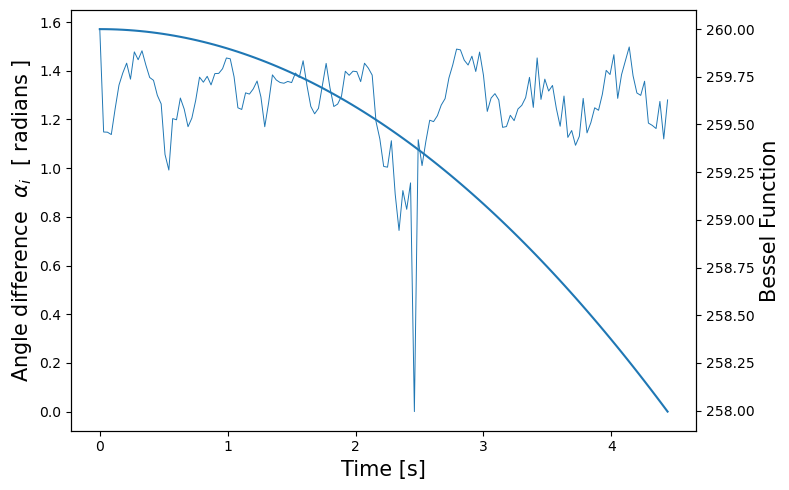

ball_2_substrate_1_i_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


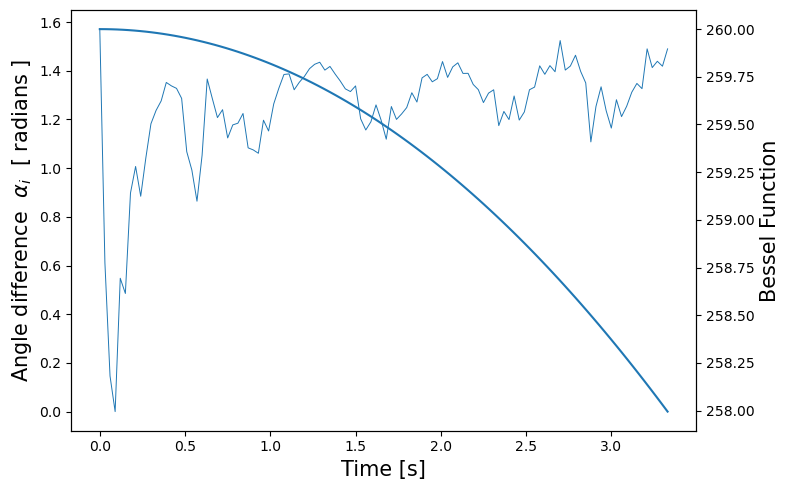

ball_2_substrate_1_i_3


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


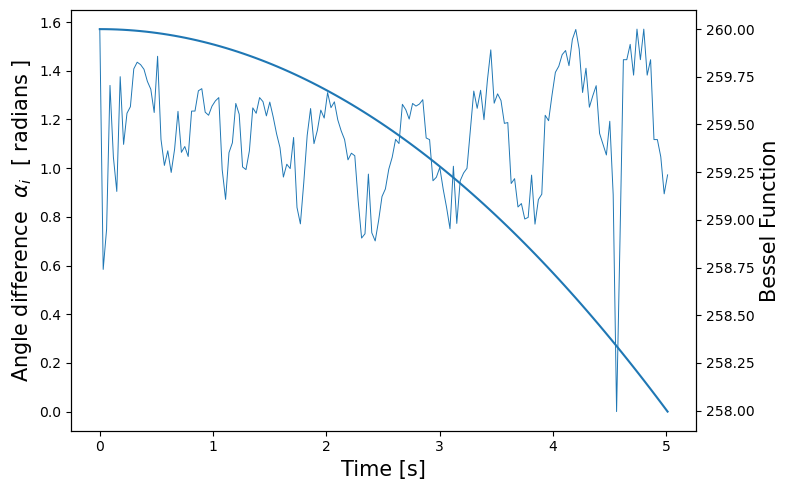

/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


ball_2_substrate_1_o_1


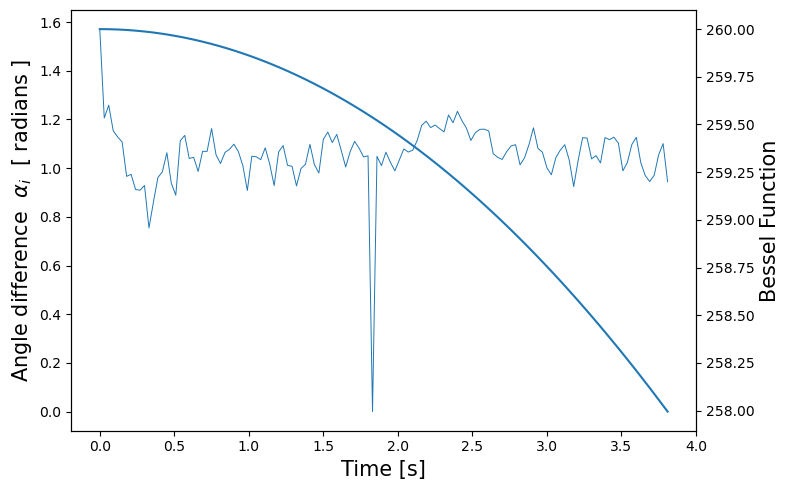

ball_2_substrate_1_o_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


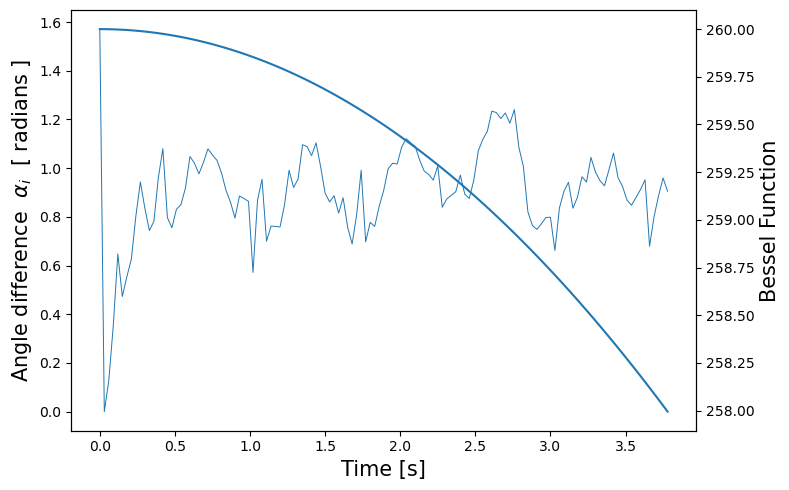

ball_2_substrate_1_o_3


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


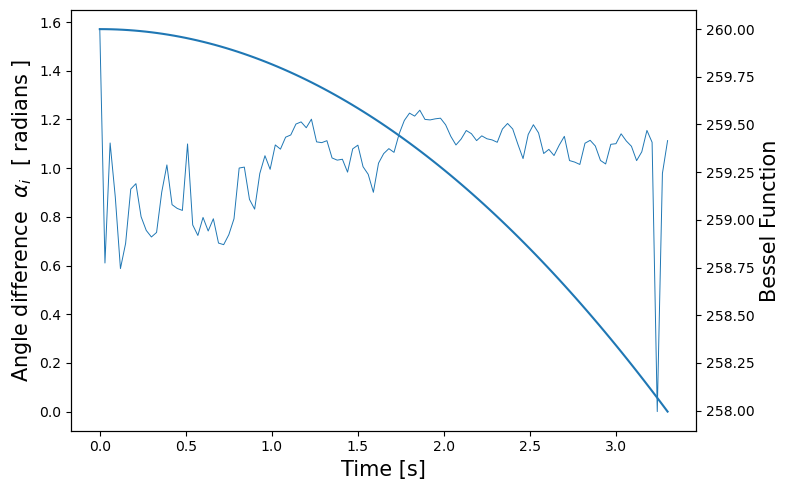

No CSV file with that name - move on
No CSV file with that name - move on
No CSV file with that name - move on
ball_2_substrate_2_o_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


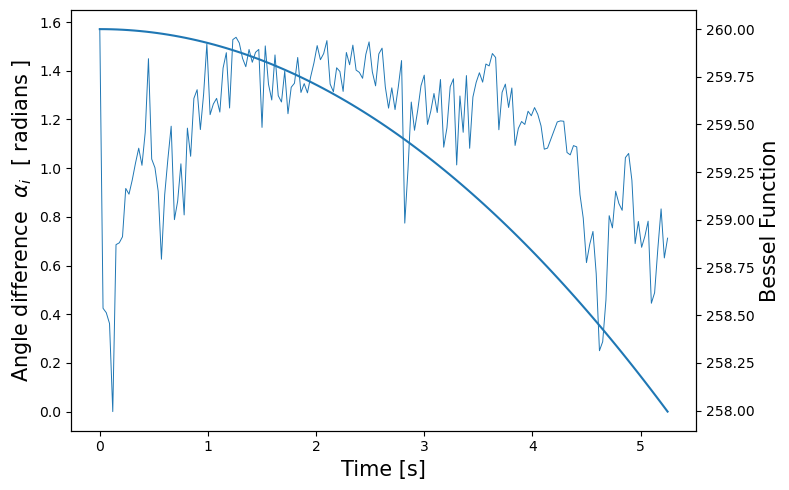

ball_2_substrate_2_o_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


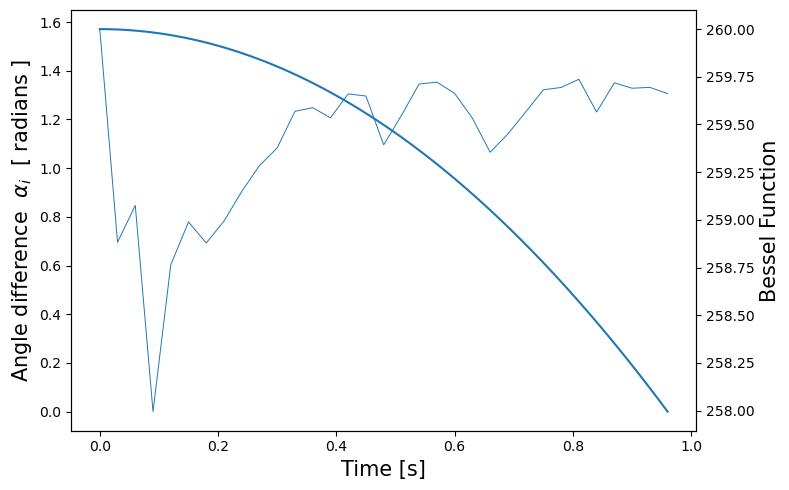

No CSV file with that name - move on
ball_3_substrate_1_i_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


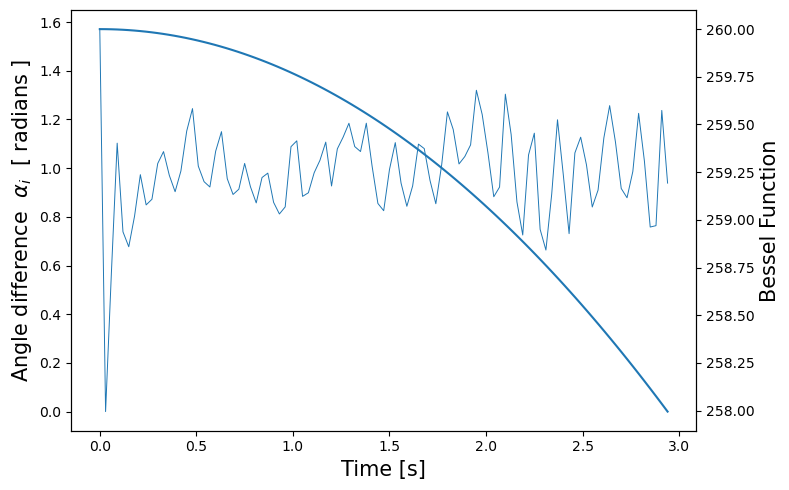

ball_3_substrate_1_i_2


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


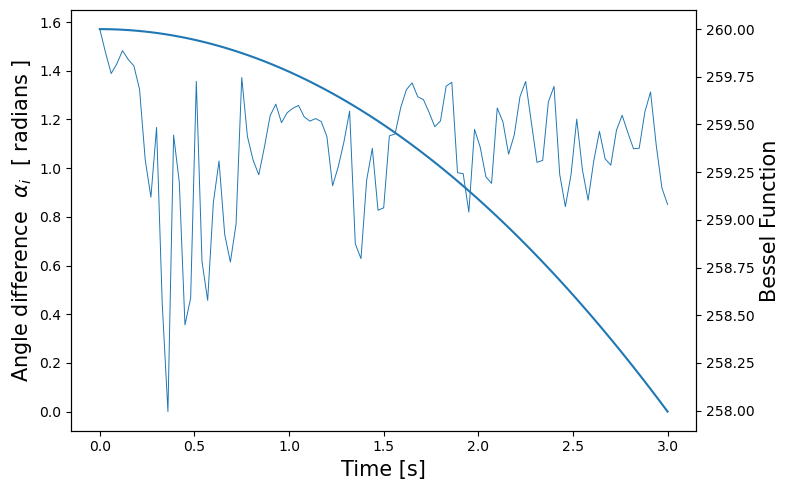

/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


No CSV file with that name - move on
ball_3_substrate_1_o_1


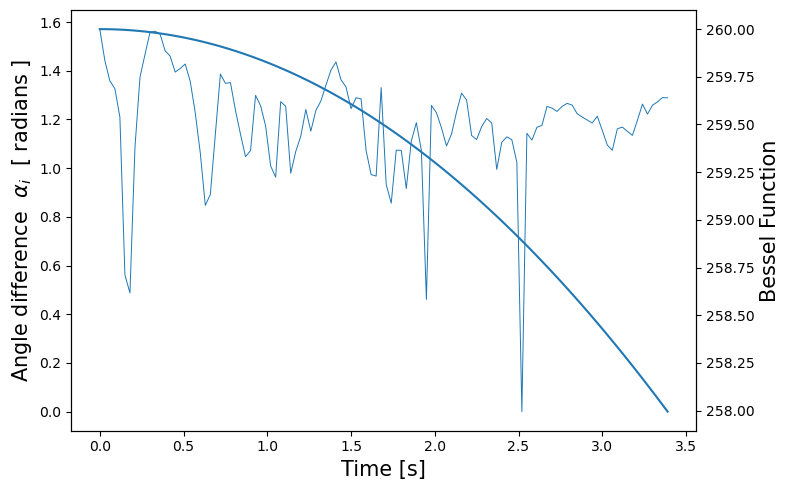

ball_3_substrate_1_o_2
ball_3_substrate_1_o_3
ball_3_substrate_2_i_1


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


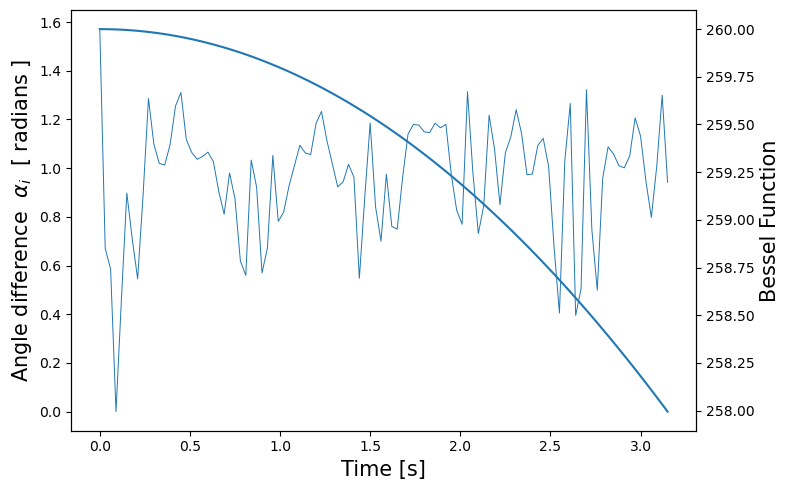

ball_3_substrate_2_i_2
ball_3_substrate_2_i_3


/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


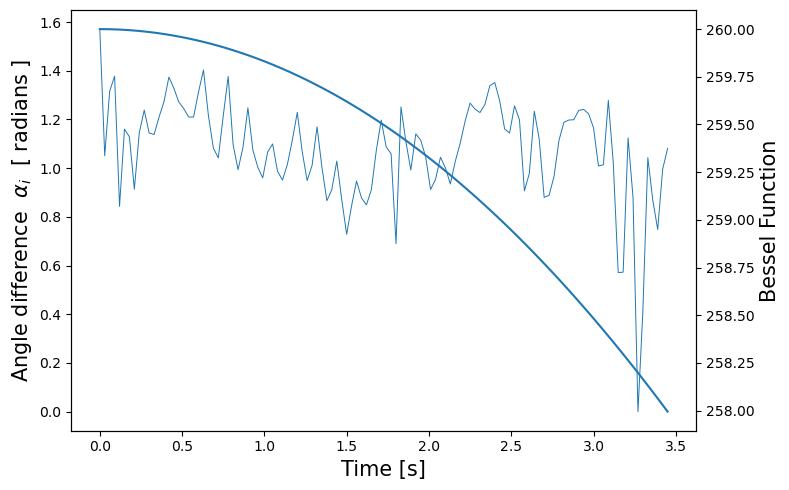

/tmp/ipykernel_144354/3816864404.py:56: RuntimeWarning: divide by zero encountered in divide
  angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp


ball_3_substrate_2_o_1


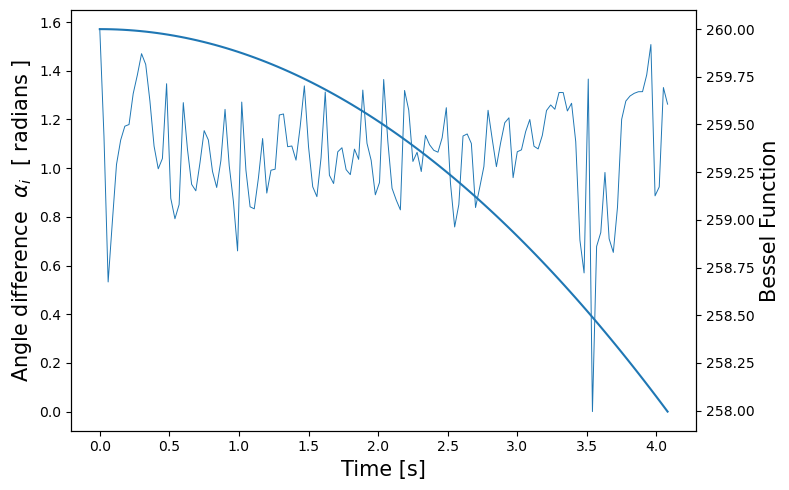

ball_3_substrate_2_o_2
ball_3_substrate_2_o_3


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0

for ball in [1, 2, 3]:
    for sub in [1, 2]:
        for i_o in ['i', 'o']:
            for take in [1, 2, 3]:
                try:
                    # Import data
                    experiments = pd.read_csv(f"CSV/ball_{ball}_substrate_{sub}_{i_o}_{take}.csv")
                    print(f'ball_{ball}_substrate_{sub}_{i_o}_{take}')
                    # NOTE: Fixed radius 16.75
                    experiments = experiments[['POSITION_X', 'POSITION_Y', 'FRAME']]  # Columns of interest
                    experiments = experiments[3:]
                    experiments[['POSITION_X', 'POSITION_Y']] = experiments[['POSITION_X', 'POSITION_Y']].astype(float)
                    experiments['FRAME'] = experiments['FRAME'].astype(int)
                    experiments = experiments.sort_values(by=['FRAME'])

                    # Data frame
                    vwr_df = pd.DataFrame(columns=['FRAME', 'POSITION_X', 'POSITION_Y',
                                                   'VELOCITY_X', 'VELOCITY_Y', 'VELOCITY_MAG',
                                                   'RADIUS', 'ANGULAR_VELOCITY', 'ANGLE_DIFF'])

                    # Calculate v, w and r per agent
                    frames_num = len(experiments['FRAME'])
                    vel_x = np.zeros(frames_num)
                    vel_y = np.zeros(frames_num)
                    vel_mag = np.zeros(frames_num)

                    ind_prev = experiments[experiments['FRAME'] == 0].index
                    frames_length = len(experiments['FRAME'])
                    if not len(ind_prev) == 0: 

                        x_prev = experiments.loc[ind_prev, 'POSITION_X'].iloc[0]
                        y_prev = experiments.loc[ind_prev, 'POSITION_Y'].iloc[0]

                        # Assume unit time step per frame
                        for i in experiments['FRAME'].values:
                            ind = experiments[experiments['FRAME'] == i].index
                            x = experiments.loc[ind, 'POSITION_X'].iloc[0]
                            y = experiments.loc[ind, 'POSITION_Y'].iloc[0]

                            vel_x[i] = x - x_prev
                            vel_y[i] = y - y_prev
                            vel_mag[i] = np.sqrt(vel_x[i]**2 + vel_y[i]**2)

                            # Update values
                            ind_prev = ind
                            x_prev = x
                            y_prev = y

                        vel_max = max(vel_mag)

                        angle = np.sqrt((vel_max**2 - vel_mag**2))/vel_mag  # Normal comp
                        angle = np.arctan(angle)

                        vwr_df = pd.DataFrame({'FRAME': 0.03*experiments['FRAME'].values,
                                            'POSITION_X': experiments['POSITION_X'], 'POSITION_Y': experiments['POSITION_Y'],
                                            'VELOCITY_X': vel_x, 'VELOCITY_Y': vel_y, 'VELOCITY_MAG': vel_mag, 'ANGLE_DIFF': angle})

                        # Make pretty plots
                        fig, ax1 = plt.subplots(figsize=(8, 5))

                        ax1.set_xlabel('Time [s]', fontsize=15)
                        ax1.set_ylabel('Angle difference  $\\alpha_i$  [ radians ]', fontsize=15)
                        ax1.plot(vwr_df['FRAME'], vwr_df['ANGLE_DIFF'], linewidth=0.7)
                        ax1.tick_params(axis='y')

                        ax2 = ax1.twinx()
                        xs = np.linspace(0, 20, 100)
                        bessel = 4 * 65 * j0(4 * xs / (7 * 65))
                        ax2.set_ylabel('Bessel Function', fontsize=15)
                        # X values changed to fit with the frame but not in same units
                        ax2.plot(xs*max(vwr_df['FRAME'])/20, bessel)
                        ax2.tick_params(axis='y')

                        fig.tight_layout()
                        plt.show()
                except FileNotFoundError:
                    print('No CSV file with that name - move on')